In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Cleaned_reviewsData (1).csv')

In [3]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Customer_Name', 'Rating', 'Review_Title',
       'User_Review', 'model_name', 'Clean_reviews', 'sentiment'],
      dtype='object')

In [4]:
df=df[['Rating', 'Review_Title',
       'User_Review', 'model_name', 'sentiment']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rating        275 non-null    int64 
 1   Review_Title  275 non-null    object
 2   User_Review   275 non-null    object
 3   model_name    275 non-null    object
 4   sentiment     275 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 10.9+ KB


<AxesSubplot:>

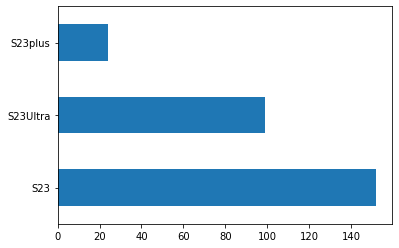

In [6]:
df.model_name.value_counts().plot(kind='barh')

In [7]:
!pip install wordcloud

In [8]:
from wordcloud import WordCloud

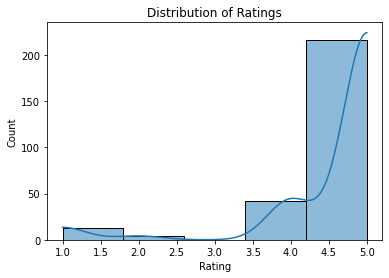

In [9]:
# Step 2: Distribution of Ratings
plt.figure(figsize=(6, 4))
sns.histplot(df['Rating'], bins=5, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

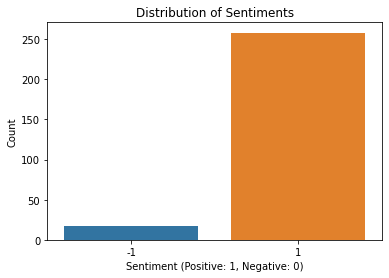

In [10]:
# Step 3: Distribution of Sentiments
plt.figure(figsize=(6, 4))
sns.countplot(df['sentiment'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment (Positive: 1, Negative: 0)')
plt.ylabel('Count')
plt.show()

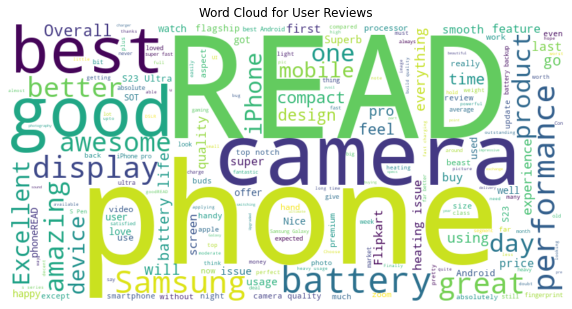

In [11]:
# Step 4: Word Cloud for User_Review
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['User_Review']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for User Reviews')
plt.show()

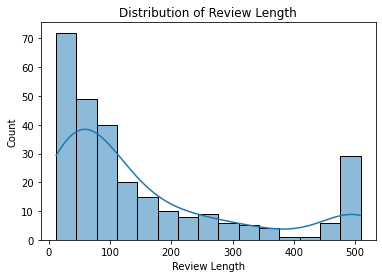

In [18]:
# Step 5: Review Length
df['User_Review'].apply(len)
plt.figure(figsize=(6, 4))
sns.histplot(df['User_Review'].apply(len), bins=15, kde=True)
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

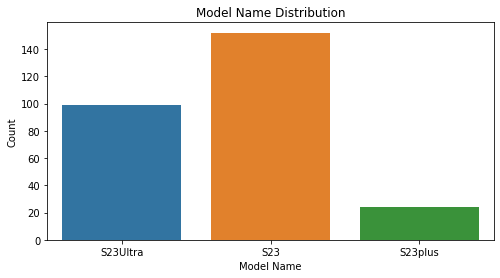

In [19]:
# Step 6: Model Name Distribution
plt.figure(figsize=(8, 4))
sns.countplot(df['model_name'])
plt.title('Model Name Distribution')
plt.xlabel('Model Name')
plt.ylabel('Count')
plt.show()

In [20]:
# Step 2: Word Frequency Analysis
word_freq = pd.Series(' '.join(df['User_Review']).lower().split()).value_counts()


In [21]:
word_freq

more          286
is            260
the           213
and           175
i             118
             ... 
cool            1
such            1
wow.read        1
aspectread      1
plusread        1
Length: 1830, dtype: int64

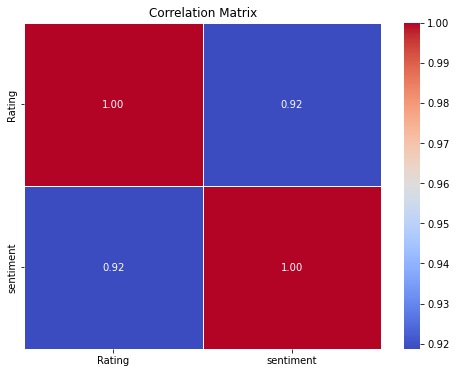

In [22]:
# Step 3: Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

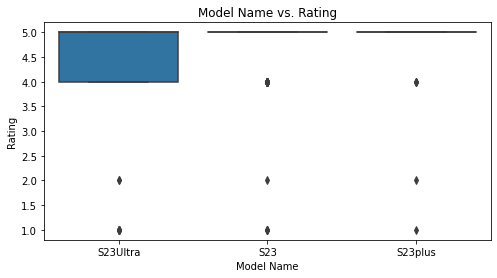

In [23]:
# Step 5: Model Comparison
plt.figure(figsize=(8, 4))
sns.boxplot(x='model_name', y='Rating', data=df)
plt.title('Model Name vs. Rating')
plt.xlabel('Model Name')
plt.ylabel('Rating')
plt.show()

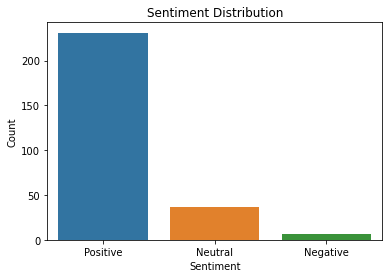

In [30]:
from textblob import TextBlob

# Sentiment Analysis using TextBlob
df['Sentiment_Polarity'] = df['User_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment'] = df['Sentiment_Polarity'].apply(lambda x: 'Positive' if x > 0.3 else ('Negative' if x < 0 else 'Neutral'))

# Visualize Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(df['Sentiment'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

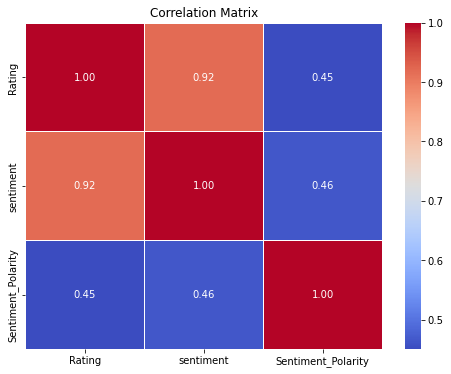

In [31]:
# Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [34]:
df.drop(['sentiment'],axis=1,inplace=True)

In [35]:
df

,Rating,Review_Title,User_Review,model_name,Sentiment_Polarity,Sentiment
0,5,Awesome,"Excellent product and awesome features , zoom ...",S23Ultra,0.612500,Positive
1,5,Worth every penny,"I ordered the product during pre-book period, ...",S23Ultra,0.574242,Positive
2,5,Brilliant,One of the best camera phone 🤳 📱#samsung galax...,S23Ultra,0.750000,Positive
3,5,Highly recommended,Fantastic mobile in all means. This is the bes...,S23Ultra,0.356809,Positive
4,5,Best in the market!,The best of the best. S23 Ultra is the best ph...,S23Ultra,0.757143,Positive
...,...,...,...,...,...,...
270,5,Highly recommended,Phone is very good but size and weight is big ...,S23plus,0.240312,Neutral
271,5,Perfect product!,Good flat display. Currenlt battery is also go...,S23plus,0.468750,Positive
272,5,Highly recommended,Exceptional Performance and Experience.Have Ba...,S23plus,0.333333,Positive
273,2,Bad quality,Not good product it's worst service from Flipk...,S23plus,-0.283333,Negative


In [36]:
from transformers import pipeline

# Load the pre-trained emotion analysis model
emotion_analyzer = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [44]:
# Sample text for emotion analysis
text = "lafoots are more in this area!"

# Perform emotion analysis on the text
result = emotion_analyzer(text)[0]['label']

# Output the emotion and score
print(result)


NEGATIVE


In [46]:
df['emotion_lable']=df.User_Review.apply(lambda x: emotion_analyzer(x)[0]['label'])
df['emotion_score']=df.User_Review.apply(lambda x:emotion_analyzer(x)[0]['score'])

In [47]:
df

,Rating,Review_Title,User_Review,model_name,Sentiment_Polarity,Sentiment,emotion_lable,emotion_score
0,5,Awesome,"Excellent product and awesome features , zoom ...",S23Ultra,0.612500,Positive,POSITIVE,0.997543
1,5,Worth every penny,"I ordered the product during pre-book period, ...",S23Ultra,0.574242,Positive,POSITIVE,0.999710
2,5,Brilliant,One of the best camera phone 🤳 📱#samsung galax...,S23Ultra,0.750000,Positive,POSITIVE,0.999499
3,5,Highly recommended,Fantastic mobile in all means. This is the bes...,S23Ultra,0.356809,Positive,POSITIVE,0.999588
4,5,Best in the market!,The best of the best. S23 Ultra is the best ph...,S23Ultra,0.757143,Positive,POSITIVE,0.999760
...,...,...,...,...,...,...,...,...
270,5,Highly recommended,Phone is very good but size and weight is big ...,S23plus,0.240312,Neutral,POSITIVE,0.999712
271,5,Perfect product!,Good flat display. Currenlt battery is also go...,S23plus,0.468750,Positive,POSITIVE,0.958293
272,5,Highly recommended,Exceptional Performance and Experience.Have Ba...,S23plus,0.333333,Positive,NEGATIVE,0.922420
273,2,Bad quality,Not good product it's worst service from Flipk...,S23plus,-0.283333,Negative,NEGATIVE,0.999814


<AxesSubplot:>

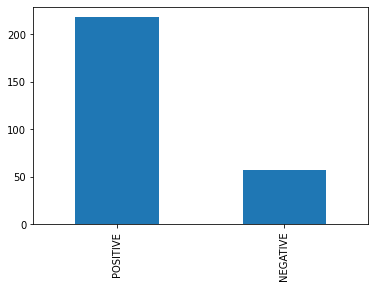

In [49]:
df.emotion_lable.value_counts().plot(kind='bar')

In [50]:
# Sample text for emotion analysis
text = "I am feeling really happy and excited about this new project!"

# Perform emotion analysis on the text
result = emotion_analyzer(text)

# Output the emotion and score
print(result)

[{'label': 'POSITIVE', 'score': 0.9998719692230225}]


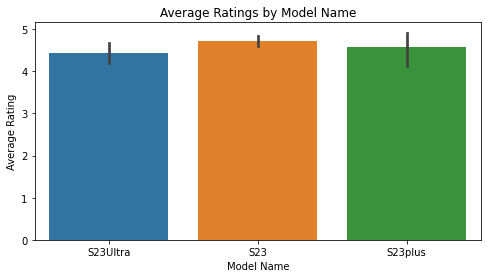

In [51]:
# Review Titles Analysis
review_title_freq = pd.Series(' '.join(df['Review_Title']).lower().split()).value_counts()
# Visualize the most common words or phrases in review titles

# Model Name vs. Ratings
plt.figure(figsize=(8, 4))
sns.barplot(x='model_name', y='Rating', data=df)
plt.title('Average Ratings by Model Name')
plt.xlabel('Model Name')
plt.ylabel('Average Rating')
plt.show()

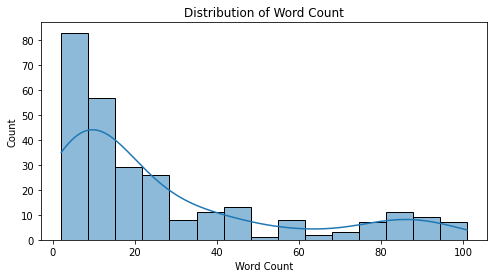

In [52]:
# Word Count Analysis
df['Word_Count'] = df['User_Review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 4))
sns.histplot(df['Word_Count'], bins=15, kde=True)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()

In [53]:
# Word Frequency by Sentiment
positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['User_Review'])
negative_reviews = ' '.join(df[df['Sentiment'] == 'Negative']['User_Review'])
# Perform word frequency analysis for positive_reviews and negative_reviews separately


In [54]:
positive_reviews

"Excellent product and awesome features , zoom is beyond comparisonExcellent display and good battery life. S pen is a master in it's own league.While sticking screen guards Kindly make sure glue doesn't leak to the speaker or S pen  modules as it may create an issue Inorder to avail the offerPlease go toAccountCouponsAll rewards and scroll downYou will get the offer mentioned and you can order the same if you are eligibleHappy purchasingREAD MORE I ordered the product during pre-book period, exchanging my old OP6.The product is great, the seller delivered in time. The exchange process with Flipkart was also great. After the return period I got my Galaxy buds 2 and Watch 4 classic as well.The camera quality is excellent, the battery life is great as well. I am getting around 10 hours SOT, and 24 hours total time in a full recharge.OneUI is one of the best Android experience you can get.Overall a great deal.READ MORE One of the best camera phone 🤳 📱#samsung galaxy s23 ultra 💯 🤞READ MORE

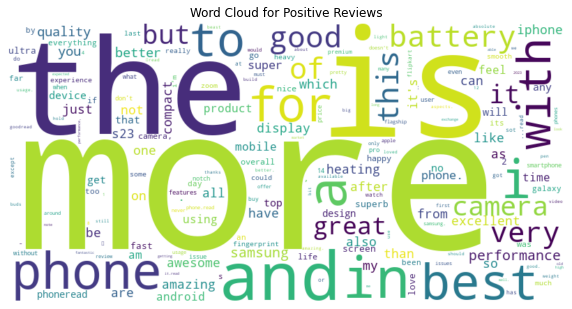

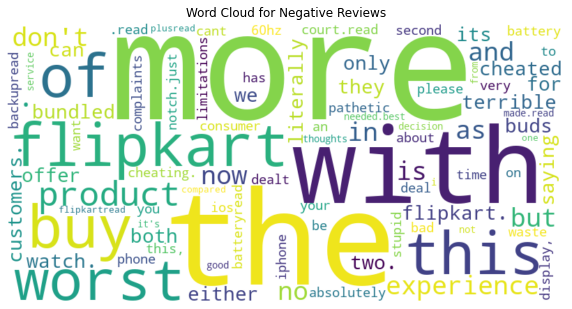

In [56]:
from collections import Counter
# Word frequency analysis for positive_reviews
positive_word_freq = Counter(positive_reviews.lower().split())
# Visualize the most common words
plt.figure(figsize=(10, 6))
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_word_freq)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

# Word frequency analysis for negative_reviews
negative_word_freq = Counter(negative_reviews.lower().split())
# Visualize the most common words
plt.figure(figsize=(10, 6))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_word_freq)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()






In [57]:
df

,Rating,Review_Title,User_Review,model_name,Sentiment_Polarity,Sentiment,emotion_lable,emotion_score,Word_Count
0,5,Awesome,"Excellent product and awesome features , zoom ...",S23Ultra,0.612500,Positive,POSITIVE,0.997543,74
1,5,Worth every penny,"I ordered the product during pre-book period, ...",S23Ultra,0.574242,Positive,POSITIVE,0.999710,84
2,5,Brilliant,One of the best camera phone 🤳 📱#samsung galax...,S23Ultra,0.750000,Positive,POSITIVE,0.999499,14
3,5,Highly recommended,Fantastic mobile in all means. This is the bes...,S23Ultra,0.356809,Positive,POSITIVE,0.999588,87
4,5,Best in the market!,The best of the best. S23 Ultra is the best ph...,S23Ultra,0.757143,Positive,POSITIVE,0.999760,17
...,...,...,...,...,...,...,...,...,...
270,5,Highly recommended,Phone is very good but size and weight is big ...,S23plus,0.240312,Neutral,POSITIVE,0.999712,24
271,5,Perfect product!,Good flat display. Currenlt battery is also go...,S23plus,0.468750,Positive,POSITIVE,0.958293,15
272,5,Highly recommended,Exceptional Performance and Experience.Have Ba...,S23plus,0.333333,Positive,NEGATIVE,0.922420,16
273,2,Bad quality,Not good product it's worst service from Flipk...,S23plus,-0.283333,Negative,NEGATIVE,0.999814,9


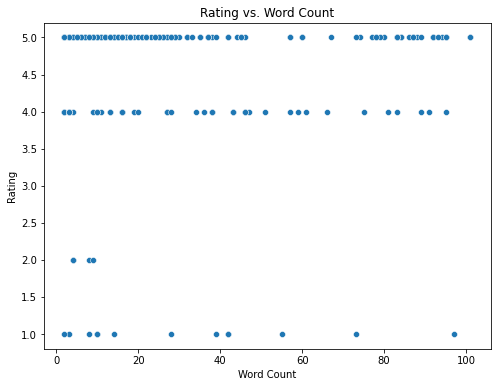

In [58]:
# Rating vs. Word Count
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Word_Count', y='Rating', data=df)
plt.title('Rating vs. Word Count')
plt.xlabel('Word Count')
plt.ylabel('Rating')
plt.show()

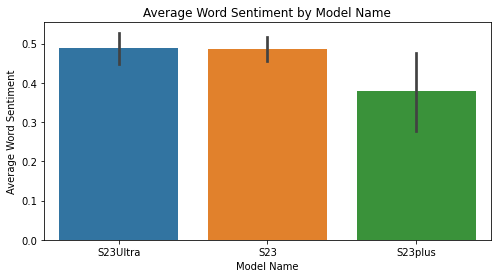

In [62]:
plt.figure(figsize=(8, 4))
sns.barplot(x='model_name', y='Sentiment_Polarity', data=df)
plt.title('Average Word Sentiment by Model Name')
plt.xlabel('Model Name')
plt.ylabel('Average Word Sentiment')
plt.show()

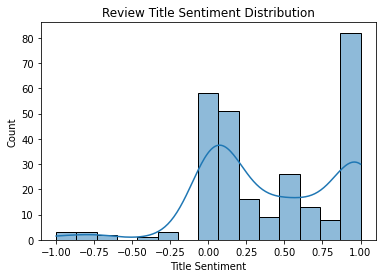

In [63]:
# Review Title Sentiment (using TextBlob)
df['Title_Sentiment'] = df['Review_Title'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(6, 4))
sns.histplot(df['Title_Sentiment'], bins=15, kde=True)
plt.title('Review Title Sentiment Distribution')
plt.xlabel('Title Sentiment')
plt.ylabel('Count')
plt.show()

In [65]:

import spacy
import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import pyLDAvis.gensim_models as gensimvis

In [69]:
# Load spaCy model for text preprocessing
nlp = spacy.load("en_core_web_sm")

In [70]:

# Preprocess text data
def preprocess_text(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]


In [86]:
import spacy

# Check if the 'en_core_web_sm' model is installed and available
nlp = spacy.load('en_core_web_sm')
df['Processed_User_Review'] = df['User_Review'].apply(preprocess_text)

# Create a dictionary and a corpus from the preprocessed text
workers = 1  # Set the number of workers
dictionary = Dictionary(df['Processed_User_Review'])
corpus = [dictionary.doc2bow(doc) for doc in df['Processed_User_Review']]

# Train the LDA model
num_topics = 3  # You can set the number of topics according to your preference
lda_model = gensim.models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)
# lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                        id2word=id2word,
#                                        num_topics=num_topics)

# Visualize the topics
lda_visualization = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_visualization)


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [76]:
dictionary

In [78]:
# Load the regular expression library
import re
# Remove punctuation
df['User_Review'] = \
df['User_Review'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
df['User_Review'] = \
df['User_Review'].map(lambda x: x.lower())
# Print out the first rows of papers
df['User_Review'].head()

<>:5: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \.
C:\Users\DELL\AppData\Local\Temp\ipykernel_26172\2375734623.py:5: DeprecationWarning: invalid escape sequence \.
  df['User_Review'].map(lambda x: re.sub('[,\.!?]', '', x))


0    excellent product and awesome features  zoom i...
1    i ordered the product during pre-book period e...
2    one of the best camera phone 🤳 📱#samsung galax...
3    fantastic mobile in all means this is the best...
4    the best of the best s23 ultra is the best pho...
Name: User_Review, dtype: object

In [80]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df.User_Review.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['excellent', 'product', 'awesome', 'features', 'zoom', 'beyond', 'display', 'good', 'battery', 'life', 'pen', 'master', 'leaguewhile', 'sticking', 'screen', 'guards', 'kindly', 'make', 'sure', 'glue', 'leak', 'speaker', 'pen', 'modules', 'may', 'create', 'issue', 'inorder', 'avail', 'offerplease']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


In [93]:
id2word

In [89]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.032*"good" + 0.028*"phone" + 0.022*"battery" + 0.020*"excellent" + '
  '0.020*"camera" + 0.018*"performance" + 0.016*"best" + 0.012*"amazing" + '
  '0.009*"compact" + 0.008*"itread"'),
 (1,
  '0.032*"phone" + 0.030*"best" + 0.015*"samsung" + 0.014*"phoneread" + '
  '0.011*"one" + 0.011*"niceread" + 0.009*"battery" + 0.009*"first" + '
  '0.008*"life" + 0.008*"camera"'),
 (2,
  '0.028*"battery" + 0.019*"good" + 0.018*"camera" + 0.016*"best" + '
  '0.015*"phone" + 0.014*"better" + 0.014*"performance" + 0.012*"iphone" + '
  '0.010*"awesome" + 0.009*"samsung"'),
 (3,
  '0.020*"read" + 0.016*"display" + 0.012*"good" + 0.011*"performance" + '
  '0.010*"battery" + 0.010*"samsung" + 0.009*"notch" + 0.008*"hz" + '
  '0.008*"hrs" + 0.008*"great"'),
 (4,
  '0.030*"phone" + 0.020*"great" + 0.018*"camera" + 0.016*"quality" + '
  '0.015*"best" + 0.012*"battery" + 0.011*"read" + 0.011*"display" + '
  '0.011*"good" + 0.011*"one"'),
 (5,
  '0.026*"good" + 0.024*"battery" + 0.017*"phone" + 0.01

Topic 1: great good battery product read fast camera samsung watch best


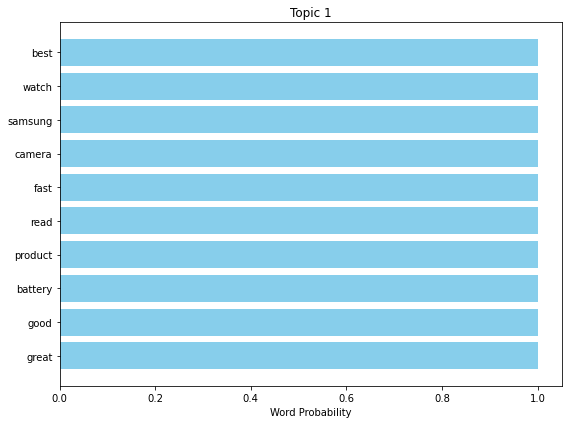

Topic 2: phone camera good battery best iphone better display performance awesome


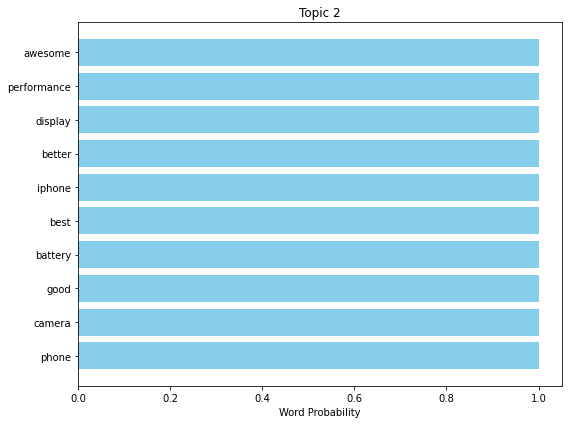

Topic 3: phone samsung best battery performance camera amazing s23 life mobile


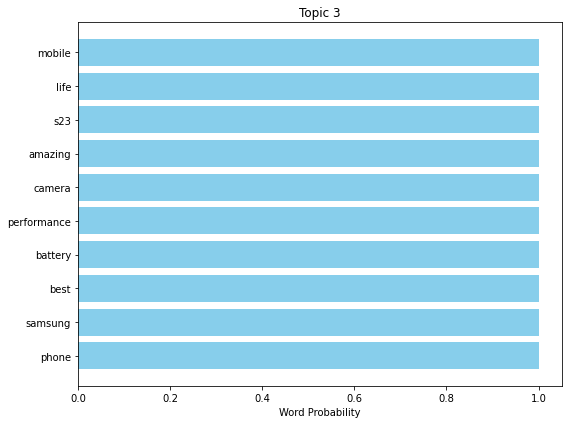

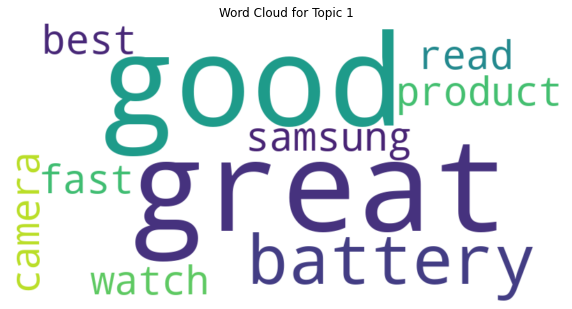

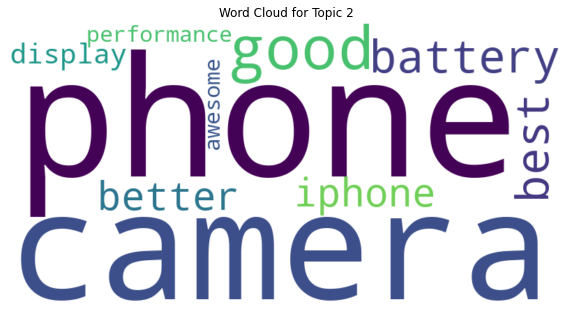

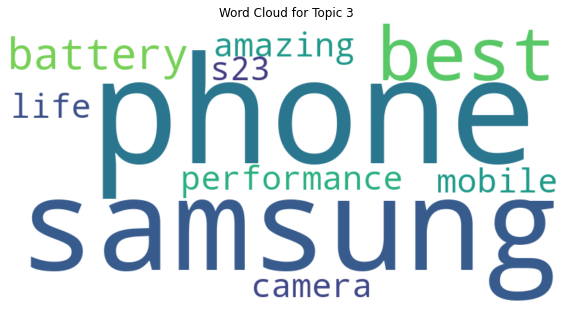

In [95]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have loaded the dataset into a DataFrame called "df"
# Convert the text data (User_Review) into a list
user_reviews = df['User_Review'].tolist()

# Create a CountVectorizer to convert the text data into a document-term matrix
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(user_reviews)

# Train the LDA model
num_topics = 3  # You can set the number of topics according to your preference
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(dtm)

# Get the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

n_top_words = 10  # Set the number of top words to display for each topic
feature_names = vectorizer.get_feature_names()
top_words = get_top_words(lda_model, feature_names, n_top_words)

# Print and plot the top words for each topic
for i, words in enumerate(top_words):
    print(f"Topic {i + 1}: {' '.join(words)}")

    # Plot the top words as a bar plot
    plt.figure(figsize=(8, 6))
    plt.barh(range(n_top_words), [1] * n_top_words, color='white')
    plt.barh(range(n_top_words), [1] * n_top_words, color='skyblue')
    plt.yticks(range(n_top_words), words)
    plt.title(f"Topic {i + 1}")
    plt.xlabel("Word Probability")
    plt.tight_layout()
    plt.show()

# Create word clouds for each topic
for i, words in enumerate(top_words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Topic {i + 1}")
    plt.axis("off")
    plt.show()
